**Using NLTK**

First import

Then download

In [1]:
import nltk
from nltk.corpus import wordnet as wn

#punkt word and sentence tokenizer
nltk.download('punkt')

#very common words
nltk.download('stopwords')

#wordnet lexical database of English
nltk.download('wordnet')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Emma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Emma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Emma\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**What is a dog?**

A synset is a set of synonyms - all the meanings that 'dog' could have

Each sysnset is labelled: word, part of speech, number (place in the list of possible meanings)


In [2]:


data = wn.synsets('dog')
print(data)
print("")

mainsense = wn.synset('dog.n.01')
print(mainsense.definition())
print(mainsense.hypernyms())
print(mainsense.hyponyms())
print("")

secondsense = wn.synset('dog.n.04')
print(secondsense.definition())
print(secondsense.hypernyms())
print(secondsense.hyponyms())
print("")


[Synset('dog.n.01'), Synset('frump.n.01'), Synset('dog.n.03'), Synset('cad.n.01'), Synset('frank.n.02'), Synset('pawl.n.01'), Synset('andiron.n.01'), Synset('chase.v.01')]

a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds
[Synset('canine.n.02'), Synset('domestic_animal.n.01')]
[Synset('basenji.n.01'), Synset('corgi.n.01'), Synset('cur.n.01'), Synset('dalmatian.n.02'), Synset('great_pyrenees.n.01'), Synset('griffon.n.02'), Synset('hunting_dog.n.01'), Synset('lapdog.n.01'), Synset('leonberg.n.01'), Synset('mexican_hairless.n.01'), Synset('newfoundland.n.01'), Synset('pooch.n.01'), Synset('poodle.n.01'), Synset('pug.n.01'), Synset('puppy.n.01'), Synset('spitz.n.01'), Synset('toy_dog.n.01'), Synset('working_dog.n.01')]

someone who is morally reprehensible
[Synset('villain.n.01')]
[Synset('perisher.n.01')]



In [3]:
#Experiment: write mainsense. and then press tab to find possible functions



**How much is a dog like a bucket?**

In [4]:
dog = wn.synset('dog.n.01')
wolf = wn.synset('wolf.n.01')
cat = wn.synset('cat.n.01')
bucket = wn.synset('bucket.n.01')
telephone = wn.synset('telephone.n.01')
glacier = wn.synset('glacier.n.01')

print("dog similarity to wolf:     ",dog.lch_similarity(wolf))
print("dog similarity to cat:      ",dog.lch_similarity(cat))
print("dog similarity to bucket:   ",dog.lch_similarity(bucket))
print("dog similarity to glacier:  ",dog.lch_similarity(glacier))
print("dog similarity to telephone:",dog.lch_similarity(telephone))


dog similarity to wolf:      2.538973871058276
dog similarity to cat:       2.0281482472922856
dog similarity to bucket:    1.2396908869280152
dog similarity to glacier:   1.3350010667323402
dog similarity to telephone: 1.2396908869280152


![similarity](https://lh3.googleusercontent.com/UNd5lFj8qDAKFu1nJXuH_8FAH1mJCfiIAPdWIpmsVDcD3MYVgtWiap4XiY2o4PiqDI-KqGR8ylkK-7bCG9s9u1EyMXtJhgGAAc0BgBGoqrL_7K2KH4rKIH12ke4Q4oveZLxeo5Ff2CXKdLT9KkwzAFbenjkb_MyNv5Nh5Wz9W0c2_KbgfeyTiptI7Y7WD8ZTrZvL350c1m39ce2xByYmciJeD_bCYX7aERLqMHyOe14gdg3c8psWeW_CXLDWztVsF1oelOVs7jJKmeNbglb-E3uteY4t19f0x5uOHm6m2CwTG3-qDQhhkak_Pt2tV4xGfuU2dc_Jbitcj0w3WvU4aNqPcKitoKN3pMfqFv86n_TmzRdZxTwRyfjYDZrNenihqRHPAXUElVvDKDH7rF_I_-sUTqTg1d9xPdEAntu9U_3pFSxaRGrT3N8a1jvuZVK6J6WTS4pgRJVg0psQHBrQEKQ_Pa597XmGYK4kuSSHqfWl1dF3GEDCyew99TY_OHXyRJYoaKSn6Boo3oIfIeSPo435UjCV5ixHmJu-mhwTMYqtCixEXx9hGNCV33VIDIphmYt1P0y8fjAzEchUNueQBQJDxojg_Q29uCZEZDSDWokoOSIsSdWIjEwpeVb9LE6abJIa__KyZ5vRX58y3zYTjk_HvgH4H-s=w411-h240-no)



**Now let's get some text**


You can read text from your own computer, or somewhere on the web.

This function has been written to get documents from Project Gutenberg, and extract the interesting bits

In [5]:
#@title
import urllib3
from nltk import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import re


#@title
def readGutenberg(fileName):
  """
  readGutenberg(fileName)
  Read data from Project Gutenberg files
  """
  
  #Code required to go to the web and read data
  http = urllib3.PoolManager()
  response = http.request('GET', fileName)
  allText = response.data.decode('utf-8')    
    
  #start and end tags match string we always find at the start and end of a 
  #Gutenberg text -"*** START/END OF THE/THIS PROJECT GUTENBERG EBOOK"
  startTag = "\*\*\*.?START OF TH.?.? PROJECT GUTENBERG EBOOK"
  endTag = "\*\*\*.?END OF TH.?.? PROJECT GUTENBERG EBOOK"
  
  #search for the start and end tags, and return everything between them
  s = re.search(startTag,allText).end()
  e = re.search(endTag,allText).start()
  textChunk = allText[s:e]
  return textChunk
      

#@title
def makeBagOfWords(text):
  """
  makeBagOfWords(text)
  Turn plain text into a collection of words. Filter out punctuation, and 
  very common words
  """
  
  #Cut the text into tokens
  tokens = word_tokenize(text)
  
  #Filter these tokens, keeping only the alphanumeric ones
  real_word_tokens = [word.lower() for word in tokens if word.isalnum()]  
  
  #Filter the real words, taking out common words like "and" or "which"
  important_word_tokens = [w for w in real_word_tokens if w not in stopwords.words('english')]
  
  #Return as a bag of words, with information about how often words are found
  #in the text
  return FreqDist(important_word_tokens)

print(readGutenberg.__doc__)
print(makeBagOfWords.__doc__)



  readGutenberg(fileName)
  Read data from Project Gutenberg files
  

  makeBagOfWords(text)
  Turn plain text into a collection of words. Filter out punctuation, and 
  very common words
  


![text with similarities](https://lh3.googleusercontent.com/waqA2ow-NAsEWabhDwKZxamXNuKZY2yGdDiEKyhQ8fnED4YZno1b7M34wACq9lSCrTvHS_ul5sKgMYe0Yk3qNN1MsPgR_5ST3OR0Q5BwwPOo8a11EKqL47_Uq1nLhg6qbhYIDH_gAdIkmVGkQPEGULVh-U0MzI7Hug75ta48BayM5v0CeniLliE9z2fVq2Sle9LJ05xNxS3DhZ-Cp16qINLtQbTWO0YstQBlkIrvuo5z7q4fboDgt_B7hMWu-mC18TfDVLEfNiekadaLFeSkuVXPhbwOGDHbzQat8j1f0VTxHONYd7pvi0YtGJses_B0v9mUo4UDxflJuLHYqAOSmdQ5ueLlvM7B7xegmu3xl8vtVjA_jCZB1ExMTuBzeQRfhVZ-cuMpBN3M7bFom7QRKillapq9Y24-V06pfiwqr0XW9a7zzyWbghOEe56ZfNz_rmMg99mnWbhITdYrmYlaEm_3N8MKBb6JuRGVL2BAn9Ec0Tam8AxLgsjwSJn1qtC8RQehaiKzaT0oLfJ7sHpl445UvVTylWoUzyIc5b7gVPme2wa8PvejmcMHe-yfbPLk9XyXPMw_vNWHMI8k2e6q5AZoKtH89qhXjNe2nlVmXdGlTZ267igqFBNSu1LdtDz7tRYDGbvDoplhXtE3XHevmPSLeDc3zcg=w560-h270-no)

**And use it**

I've chosen to use a text from Project Gutenberg for this demonstration. If you like, you can experiment with a different one later

In [6]:
#@title
g_t = 'http://www.gutenberg.org/files/829/829-0.txt' 
p_p = 'http://www.gutenberg.org/files/1342/1342-0.txt' 
w_n = 'http://www.gutenberg.org/cache/epub/3300/pg3300.txt' 
m_r = 'http://www.gutenberg.org/cache/epub/9660/pg9660.txt' 
t_c = 'http://www.gutenberg.org/cache/epub/14504/pg14504.txt' 
d_d = 'http://www.gutenberg.org/files/44917/44917-0.txt' 
a_c = 'http://www.gutenberg.org/cache/epub/13476/pg13476.txt' 

In [7]:
o_s = 'http://www.gutenberg.org/cache/epub/2009/pg2009.txt'


myText = readGutenberg(o_s)
print(myText[0:760])

 ON THE ORIGIN OF SPECIES ***




Produced by Sue Asscher





THE ORIGIN OF SPECIES BY MEANS OF NATURAL SELECTION;

or, the PRESERVATION OF FAVOURED RACES IN THE STRUGGLE FOR LIFE.

By Charles Darwin, M.A., F.R.S.,

Author of "The Descent of Man," etc., etc.


Sixth London Edition, with all Additions and Corrections.

The 6th Edition is often considered the definitive edition.

Also see Project Gutenberg Etext #1228 for the First Edition.



"But with regard to the material world, we can at least go so far as
this--we can perceive that events are brought about not by insulated
interpositions of Divine power, exerted in each particular case, but by
the establishment of general laws."--Whewell: "Bridgewater Treatise".



In [8]:
word_bag = makeBagOfWords(myText)
print("The twenty commonest words: ",word_bag.most_common(20),"\n")


The twenty commonest words:  [('species', 1881), ('one', 797), ('would', 703), ('may', 662), ('many', 615), ('selection', 559), ('forms', 559), ('natural', 532), ('varieties', 481), ('plants', 466), ('two', 462), ('animals', 429), ('thus', 390), ('several', 367), ('different', 363), ('great', 361), ('distinct', 359), ('life', 350), ('case', 343), ('nature', 327)] 



![A Bag of Words](https://lh3.googleusercontent.com/28Xy7kZW6eHP7JZQiFa6DGhcRzGCR_afwsf0WsGh24bDmmTw_O_Pzcwks2NcmFLJ_WGViNnT40JHxrdOYTlfmvzHOy7hQxPwhAnBT1vSwR9UfLD6dH7ZM8lTf99iCl4YjfovyqadbdO6U-vrX2YyFqZRdCu3KbyIDHW37UlF4d2Bv7CugaPuCC4-V8MrnixNExxk5_8lmBEjV5u1KVs32CKaoxPef2W-O4rOL7plgljozDX0AyM3N7pCW2MRy7o04vEnSNF4-V6j3Ubdk9f2nzFhZErC6yX-IDdXPdYjOhCKIErKpp4FiHM-AkfM-axfGTpDNwJbpCpCwUb4ZIwAqIAhVualudbjvqeWMDxqso0L-q5yxb4-1ONDpIcqLC1i0fPaG9S3SdZGxvYIC_nfWDsoTC7UryywwKGwHirFEyiGZ8n9x8RsKeLREGWnxZSRA8o9wWirKkALCnCgXKwLlMSvjUjFnT_qXLEsRqESLJPKmtpQJGISBrLz_8Z7h9OtKdF9u9RiRQgxgOReHhSer8CR0L66DA_fvdEpYDs7iNWUg141R2UUu8XEa_jwx56LcTYf2EDLBlCBpDXWOKoRHgGnis5lfa82jrNZQ7VK6OUwGSZGZtj44mdaK0AUPQ1nTNHglzG0RgFM_k4Beds3WdAKjiQHo-Y=w164-h238-no)

In [9]:
#@title
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16,12]
import pylab
pylab.show() 

#@title
def similar_word_proportions(word,document,threshold=2.0,count=2000):
    """
    similar_word_proportions(word,document,threshold=2.0,count=2000)
    
    Calculate how much of a document consists of similar words
    """
    insts=0 #a running count of words similar to this one
    sim_dict={} #dictionary of words similar to 'word'
    considered_text=0 #a running count of all words considered in the text
    syn1=wn.synsets(word)[0] #primary sense of the word 'word'
    
    for w,f in document.most_common(count):
        if w.isalpha() and wn.synsets(w) != []:
            w0=wn.synsets(w)[0]
            if w0.pos()==syn1.pos():
                sim = syn1.lch_similarity(w0) # best thresh 1.5 to 2.0
                considered_text=considered_text+f
                if sim>threshold:
                    insts=insts+f
                    sim_dict[w]=sim
                    
    return 100*insts/considered_text,sim_dict
  
#@title
def show_similar_word_proportions(words,document,threshold=2.0,count=2000):
    """
    show_similar_word_proportions(words,document,threshold=2.0,count=2000)
    
    Calculate how much of a document consists of similar words, 
    and report back
    """
    for word in words:
      p,e=similar_word_proportions(word,document,threshold,count)
      print("{0:2.2f}% of the text is like the word \'{1}\'".format(p,word))
      print("Primary sense:{0}".format(wn.synsets(word)[0].definition()))
      print("Examples:{0}".format(e.keys()))
  
    
#@title
def display_similar_word_proportions(words,document,threshold=2.0,count=2000):
    """
    display_similar_word_proportions(words,document,threshold=2.0,count=2000)
    
    Plot the occurrences of the specific words in the wordbag,
    compared to the occurrences of similar words
    
    """
    pcts=[]
    sims={}
    fs=[]
    labels=[]
    for word in words:
        f = document.freq(word)
        if wn.synsets(word) != [] and wn.synsets(word)[0].pos()=='n':
            pct,sim=similar_word_proportions(word,document,threshold,count)
            pcts.append(pct)
            labels.append(word)
            fs.append(f)
            sims[word]=sim
    plt.figure(0)
    plt.scatter(pcts,fs)
    plt.xlabel("Percent of document similar")
    plt.ylabel("Core Word Frequency")
    for i, txt in enumerate(labels):
        plt.annotate(txt, (pcts[i], fs[i]), (pcts[i], fs[i]),fontsize=20)
    plt.show()        

print(show_similar_word_proportions.__doc__)


    show_similar_word_proportions(words,document,threshold=2.0,count=2000)
    
    Calculate how much of a document consists of similar words, 
    and report back
    


In [10]:

show_similar_word_proportions(['animal'],word_bag)


8.37% of the text is like the word 'animal'
Primary sense:a living organism characterized by voluntary movement
Examples:dict_keys(['natural', 'animals', 'great', 'birds', 'individuals', 'insects', 'young', 'inhabitants', 'man', 'animal', 'offspring', 'individual', 'mammals', 'probable', 'male', 'males', 'bird', 'fishes', 'insect', 'crustaceans', 'adult', 'organisms', 'embryo', 'american', 'fish', 'larvae', 'females', 'female', 'authors', 'equal', 'organism', 'european', 'slaves', 'longer', 'dogs', 'relative', 'independent', 'workers', 'quadrupeds', 'cirripedes', 'white', 'objects', 'reptiles', 'dog', 'embryos', 'aquatic', 'object', 'beetles', 'native', 'author', 'australian', 'judge', 'chief', 'larva', 'geologists', 'indian', 'palaeontologists', 'progeny', 'ostrich', 'observer', 'whales', 'whale', 'pupae', 'modern', 'ancestor', 'irregular', 'watson', 'monstrosities', 'observers', 'beasts', 'competitors', 'vertebrate', 'creature', 'possessor', 'batrachians', 'child', 'greyhound', 'carr

In [11]:
show_similar_word_proportions(['species','animals','microbes','selection'],word_bag)


4.69% of the text is like the word 'species'
Primary sense:(biology) taxonomic group whose members can interbreed
Examples:dict_keys(['species', 'groups', 'group', 'breeds', 'descendants', 'breed', 'vertebrata', 'aphides', 'mammalia', 'crustacea', 'polyzoa', 'molothrus'])
8.37% of the text is like the word 'animals'
Primary sense:a living organism characterized by voluntary movement
Examples:dict_keys(['natural', 'animals', 'great', 'birds', 'individuals', 'insects', 'young', 'inhabitants', 'man', 'animal', 'offspring', 'individual', 'mammals', 'probable', 'male', 'males', 'bird', 'fishes', 'insect', 'crustaceans', 'adult', 'organisms', 'embryo', 'american', 'fish', 'larvae', 'females', 'female', 'authors', 'equal', 'organism', 'european', 'slaves', 'longer', 'dogs', 'relative', 'independent', 'workers', 'quadrupeds', 'cirripedes', 'white', 'objects', 'reptiles', 'dog', 'embryos', 'aquatic', 'object', 'beetles', 'native', 'author', 'australian', 'judge', 'chief', 'larva', 'geologists',

**Challenge - use the functions from this notebook to find which concept is most often found in the text**

In [12]:
#What we have to work with:

##a collection of words from the text "The Origin of Species"
word_bag 

##function that tells us what words are the most common (change the number!)
print(word_bag.most_common(10))

##WordNet function for finding synonyms of words (change the word!)
#wn.synsets('animal')

#find out how much of the text is similar to these words - enter some words in the list
#show_similar_word_proportions([],word_bag) 

#Extra Challenge
#More suggestions of functions for finding concepts in the document wn.synset('animal.n.01').lemma_names() .hypernyms() .definition() .examples()



[('species', 1881), ('one', 797), ('would', 703), ('may', 662), ('many', 615), ('selection', 559), ('forms', 559), ('natural', 532), ('varieties', 481), ('plants', 466)]


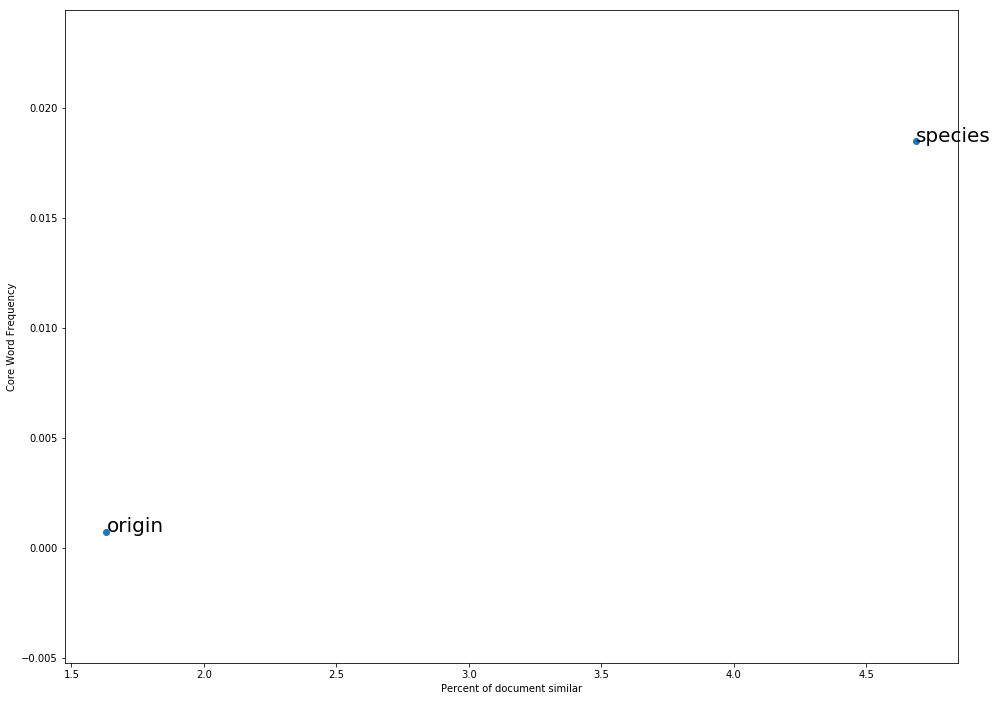

In [15]:
plt.rcParams["figure.figsize"] = [16,12]

display_similar_word_proportions(['origin','species'],word_bag)
